### Digit Recognizer challenge (Kaggle)

#### The idea of this notebook is to play with different classification algorithms in order to recognize handwritten digits from the go-to computer vision fundamentals dataset MINST

##### Steps that will be followed:
                    - Data cleaning/Formatting. 
                        - Feature scaling, is there a need? There's no need for future scaling, as all features are in the same range (0, 255)
                        - Feature engineering? No need
                        - Is the training set biased? Checked, that's not the case
                        - Data augmentation? In case having more data can be useful (high bias), create more samples from our dataset by rotating or creating images from the original dataset
                    - Split dataset into training, cv and test => Done
                    - Model architecture and optimization
                        - Choose a given model framework (logistic regression, Neuronal Network, Binary Tree)
                        - For neuronal networks, not only consider the number of layers, the neurons per layer, but also the regularization term (we could also include the learning_rate of the adam optimizer, but normally this only affects to the speed of the algorithm, not the output of it!). Higher learning rates should make the algo run faster!
                        - Start with a very simple model (high bias) and make it more complex (high variance one)
                        - Try to plot the decision boundary
                        - Compute the error on the classification as a percentage of the cv size
                        - Computes curves of Error vs parameters
                        - Compute precision and recall and F1 score.
                        - Try to analyze the errors, is there any trend? Meaning, is there any number concretely we are missclassifying more than the others (or for instance, are mumbers that are closed shaped missclassified more than the rest?). This will help us understand what the algo is lacking.
                        - Compute also main metrics as precision and recall for the algorithm
                        - Determine of the algo suffers from high bias or high variance or both 
                

The challenge specifies that the metric to be ranked will be the categorization accuracy, or in other words, the proportion of images that are correctly classified divided by the total number of predictions (TP/(TP+FN))

In [66]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import utils_digit_recognition as udr
from scipy.ndimage import rotate
import importlib
importlib.reload(udr)

<module 'utils_digit_recognition' from '/home/axelbm23/Code/utils_digit_recognition.py'>

In [67]:
# Import the data
path = "~/Code/Kaggle/Digit_Recognizer/train.csv"
train_data = pd.read_csv(path)
train_data.head(7)

# Check if there are any duplicates
print(f"number of duplicates = {sum(train_data.duplicated())}")

# As it can be read in the description of the project,
# the first column contains the digit, a.k.a label, 
# and the other 784 columns represent pixel values from
# 0 to 255. Every row corresponds to a single
# image, which is unfolded from a 28x28 matrix.

number of duplicates = 0


##### The very first part of the project will  be devoted to analyze our data. First of all, we'll split our data into train and cv and we will check whether our dataset is balanced (each category has the same relative frequency) and we'll plot some images to have a grasp on how the handwritten numbers are

In [68]:
# Get relative frequencies of labels
n,m = train_data.shape
categories = train_data['label'].nunique()
print(f"our train dataset contains {n} images")
print(f"where each image contains {m} pixels")
print(f"and each image can be classified as one of {categories} different handwritten numbers")
freq = train_data.groupby("label").size()/n
freq.name='relative frequencies'
freq
# As it can be observed, the relative frequencies of labels in the dataset
# is pretty much the same, which ensures we have a non-skewed training set

our train dataset contains 42000 images
where each image contains 785 pixels
and each image can be classified as one of 10 different handwritten numbers


label
0    0.098381
1    0.111524
2    0.099452
3    0.103595
4    0.096952
5    0.090357
6    0.098500
7    0.104786
8    0.096738
9    0.099714
Name: relative frequencies, dtype: float64

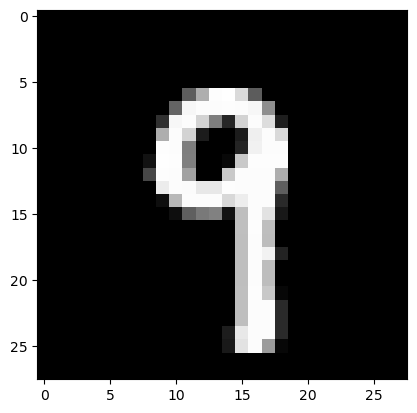

In [69]:
# We'll divide the data into a 2/3 - 1/3 split, 2/3 of it will be used 
# to compute our model parameters and 1/3 of it to fine-tune 
# the hyperparameters we're using a fixed random_state=42 to make 
# the results reproductible across multiple calls 
# (maybe good to try to remove it once we have model selected)
x_train, x_cv, y_train, y_cv = train_test_split(train_data.iloc[:,1:], train_data['label'], train_size=0.66, random_state=42)
plt.imshow(np.array(x_train.iloc[0,:]).reshape(28,28),cmap='gray', vmin=0, vmax=255)

# To-do: In case we see our algorithm experiences high bias (both J_test and J_cv are high), we can try to
# augment the input data by rotating the numbers. Mathematically, those transformations are 
# a linear transformation of what we alredy have, so co-dependence issues could arise from
# such transformation. In case we see that the algo does not improve after doing that,
# we can add some white noise to the image to make it non-linearly dependent

In [70]:
# Our first shot for a classifier will be a Dense Neuronal Network
# where we'll make use of the SparseCategoricalCrossEntropy
# loss function (Softmax function, suited for a multilabel classification problem)
# as an optimizer, we'll use Adam optimizer, just a version
# of gradient descent in which the learning rate, alpha,
# changes differently for different parameters

# For the neurons, we'll make use of achitectures with reducing
# number of nodes per layer and we'll try with three different
# values of lambda (0.1 and 10)
models = {'A_50_20_.0':{'nn':[50,20],
                    'lambda':0.0},
          'A_30_20_.0':{'nn':[30,20],
                    'lambda':0.0},
          'A_50_30_20_.0':{'nn':[50,30,20],
                        'lambda':0.0},
          'A_40_20_15_.0':{'nn':[40,20,15],
                        'lambda':0.0},
          'A_50_20_.1':{'nn':[50,20],
                    'lambda':0.1},
          'A_30_20_.1':{'nn':[30,20],
                    'lambda':0.1},
          'A_50_30_20_.1':{'nn':[50,30,20],
                        'lambda':0.1},
          'A_40_20_15_.1':{'nn':[40,20,15],
                        'lambda':0.1},
          'A_50_20_10.':{'nn':[50,20],
                    'lambda':10},
          'A_30_20_10.':{'nn':[30,20],
                    'lambda':10}, 
          'A_50_30_20_10.':{'nn':[50,30,20],
                        'lambda':10},
          'A_40_20_15_10.':{'nn':[40,20,15],
                        'lambda':10}}
i=0
results = {}
for model_key,model_params in models.items():
    results[model_key] = udr.build_model_and_train(model_params,x_train,y_train,x_cv,y_cv,categories,25)
    i+=1
    print(f"Progress...{i/len(models)}")

867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
Progress...0.08333333333333333
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
Progress...0.16666666666666666
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
Progress...0.25


Analyze the relationship between the Adam optimizer cost and the number of iterations. As it can be seen, the cost function (error) converges for all configurations, which is a sign that all parameters have been fitted to find a local minima of the cost function. Little to no value can be grasp from increasing epoch then (which would increase computation time quite substantially)

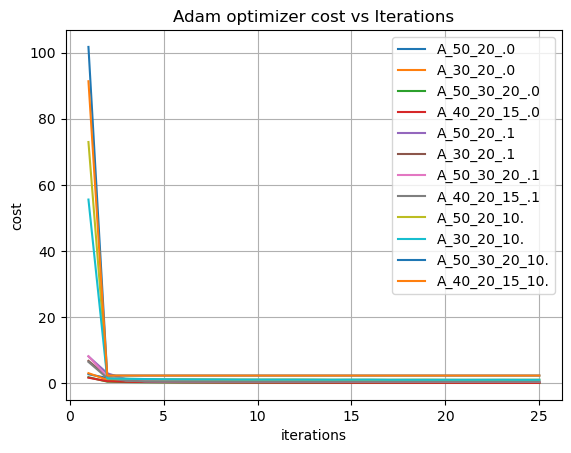

In [ ]:
error_logs = [tuple([list(results[model][-3].history.values())[0],model]) for model in results] 
udr.plot_adam_cost(error_logs)

The next thing we have to determine is whether our models suffer from bias, variance, or both. In order to do so, we'll take a look at how the relationship between them changes across the parameter settings


In [ ]:
model_train_cv_cost = [[model,round(stats[1],5),round(stats[2],5)] for model,stats in results.items()]
model_train_cv_cost = pd.DataFrame(model_train_cv_cost,columns=['model_params','J_train', 'J_cv'])
model_train_cv_cost

,model_params,J_train,J_cv
0,A_50_20_.0,0.01872,0.05399
1,A_30_20_.0,0.03730,0.06800
2,A_50_30_20_.0,0.01883,0.04510
3,A_40_20_15_.0,0.02071,0.04909
4,A_50_20_.1,0.07857,0.08901
5,A_30_20_.1,0.08056,0.08761
6,A_50_30_20_.1,0.08874,0.09580
7,A_40_20_15_.1,0.07947,0.08929
8,A_50_20_10.,0.23128,0.22906
9,A_30_20_10.,0.18658,0.18536


In [ ]:
best_config = model_train_cv_cost.loc[model_train_cv_cost['J_cv']==min(model_train_cv_cost['J_cv']),:]
best_config

,model_params,J_train,J_cv
2,A_50_30_20_.0,0.01883,0.0451


What is the human level performance we could expect from such a task? 99.99% maybe? If we compare that with the results obtained so far, we see that our best configuration delivers a 4.7% error in the cross validation set, with an error of 1.9% in the train dataset. Wrt our baseline level performance, which is at 0.001%, we consider this error still unacceptable, and we diagnose the algorithm to have **high bias** (J_test is >> baseline). Note that our J_cv >> J_test, so we could consider it to have **high variance** as well.  In order to improve this, we'll consider:
- Add more layers
- Add more neurons per layer
- Since we will increase the complexity of the algorithm, we may have to increase the value of the regularization algorithm, otherwise we may incurr overfitting. Note that in the numbers above, the highest discrepancies (in relative terms) between J_cv and J_test are found when lambda parameter are 0.
- Add more data (data augmentation)

After doing that, the next thing we can do is **Error analysis** => Analyze distributions of errors to see if there's a given category that is being misclassified more than others

In [ ]:
# Error training dataset analysis
erorr_train = dict((model,stats[-2]) for model,stats in results.items())
errors_train = pd.DataFrame.from_dict(erorr_train,orient='index')
errors_train

,6,3,9,7,5,2,1,8,0,4
A_50_20_.0,0.080925,0.119461,0.150289,0.102119,0.061657,0.198459,0.077071,0.138728,0.017341,0.053950
A_30_20_.0,0.051257,0.116054,0.165377,0.124758,0.142166,0.100580,0.037718,0.086074,0.054159,0.121857
A_50_30_20_.0,0.047893,0.185824,0.134100,0.191571,0.061303,0.145594,0.055556,0.063218,0.045977,0.068966
A_40_20_15_.0,0.054007,0.088850,0.216028,0.080139,0.080139,0.134146,0.052265,0.123693,0.067944,0.102787
A_50_20_.1,0.215794,0.068411,0.102388,0.136823,0.094123,0.138659,0.046373,0.087695,0.028466,0.081267
A_30_20_.1,0.094044,0.092253,0.186744,0.067622,0.075235,0.100761,0.035378,0.161666,0.034931,0.151366
A_50_30_20_.1,0.103659,0.044715,0.090244,0.048374,0.080894,0.167480,0.030488,0.226423,0.023171,0.184553
A_40_20_15_.1,0.115751,0.060372,0.068543,0.078529,0.081253,0.146164,0.038130,0.140717,0.032229,0.238311
A_50_20_10.,0.027609,0.209484,0.145531,0.026829,0.131025,0.123226,0.010295,0.196537,0.011543,0.117922
A_30_20_10.,0.098801,0.085267,0.076953,0.057231,0.128964,0.188708,0.016821,0.127997,0.019335,0.199923


In [ ]:
error_cv = dict((model,stats[-1]) for model,stats in results.items())
error_cv = pd.DataFrame.from_dict(error_cv,orient='index')
error_cv

,2,9,4,8,3,7,5,1,6,0
A_50_20_.0,0.173800,0.123217,0.089494,0.120623,0.150454,0.089494,0.085603,0.040208,0.088197,0.038911
A_30_20_.0,0.106076,0.132853,0.135942,0.091658,0.127703,0.120494,0.133883,0.031926,0.074150,0.045314
A_50_30_20_.0,0.158385,0.124224,0.102484,0.079193,0.130435,0.169255,0.094720,0.037267,0.062112,0.041925
A_40_20_15_.0,0.138374,0.175464,0.124108,0.144080,0.101284,0.064194,0.092725,0.037090,0.078459,0.044223
A_50_20_.1,0.129819,0.093627,0.089693,0.073958,0.082612,0.143194,0.094414,0.039339,0.233674,0.019670
A_30_20_.1,0.114309,0.175060,0.140687,0.143086,0.101519,0.082334,0.073541,0.019984,0.115907,0.033573
A_50_30_20_.1,0.167398,0.093567,0.171784,0.190789,0.054094,0.070175,0.084795,0.018275,0.130117,0.019006
A_40_20_15_.1,0.160784,0.065098,0.232941,0.112941,0.061176,0.099608,0.083922,0.021961,0.131765,0.029804
A_50_20_10.,0.125955,0.146133,0.118007,0.187404,0.215225,0.030572,0.126261,0.005809,0.035157,0.009477
A_30_20_10.,0.185493,0.075935,0.199471,0.114091,0.091424,0.064979,0.127314,0.012467,0.113336,0.015489


In [ ]:
models_vol2 = {
            'A_100_50_25_.0':{'nn':[100,50,25],
                        'lambda':0.0},
            'A_100_75_50_25_.0':{'nn':[100,75,50,25],
                        'lambda':0.0},
            'A_200_100_75_50_25_.0':{'nn':[200,100,75,50,25],
                        'lambda':0.0},
            'A_200_100_50_25_.0':{'nn':[200,100,50,25],
                        'lambda':0.0},
            'A_100_50_25_.0001':{'nn':[100,50,25],
                        'lambda':0.0001},
            'A_100_75_50_25_.0001':{'nn':[100,75,50,25],
                        'lambda':0.0001},
            'A_200_100_75_50_25_.0001':{'nn':[200,100,75,50,25],
                        'lambda':0.0001},
            'A_200_100_50_25_.0001':{'nn':[200,100,50,25],
                        'lambda':0.0001},
            'A_100_50_25_.001':{'nn':[100,50,25],
                        'lambda':0.001},
            'A_100_75_50_25_.001':{'nn':[100,75,50,25],
                        'lambda':0.001},
            'A_200_100_75_50_25_.001':{'nn':[200,100,75,50,25],
                        'lambda':0.001},
            'A_200_100_50_25_.001':{'nn':[200,100,50,25],
                        'lambda':0.001},
            'A_100_50_25_.01':{'nn':[100,50,25],
                        'lambda':0.01},
            'A_100_75_50_25_.01':{'nn':[100,75,50,25],
                        'lambda':0.01},
            'A_200_100_75_50_25_.01':{'nn':[200,100,75,50,25],
                        'lambda':0.01},
            'A_200_100_50_25_.01':{'nn':[200,100,50,25],
                        'lambda':0.01},       
          }

i=0
results_vol2 = {}
# We've incremented the epoch of the algorithms as they're more complex than before, so maybe
# we need extra iterations to make the parameters converge
for model_key,model_params in models_vol2.items():
    results_vol2[model_key] = udr.build_model_and_train(model_params,x_train,y_train,x_cv,y_cv,categories,100)
    i+=1
    print(f"Progress...{i/len(models_vol2)}")

867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
Progress...0.07692307692307693
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
Progress...0.15384615384615385
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
Progress...0.23076923076923078
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
Progress...0.3076923076923077
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
Progress...0.38461538461538464
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
Progress...0.46153846153846156
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
Progress...0.5384615384615384
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
Progress...0.6153846153846154
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step
447/447 ━━━━━━━━━━━━━━━━

We can see above that with epoch=100 our CrossEntropy cost function already converges, so that indicates our estimates are robust and succesfully find a local minima for the cost function. Seems there's no need to push epoch further

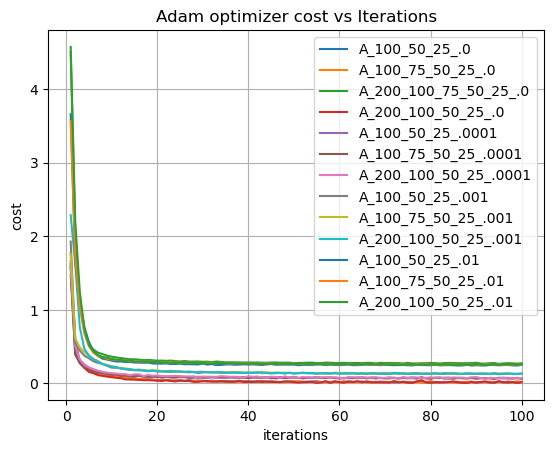

In [64]:
error_logs = [tuple([list(results_vol2[model][-3].history.values())[0],model]) for model in results_vol2] 
udr.plot_adam_cost(error_logs)

In [65]:
model_train_cv_cost_vol2 = [[model,round(stats[1],5),round(stats[2],5)] for model,stats in results_vol2.items()]
model_train_cv_cost_vol2 = pd.DataFrame(model_train_cv_cost_vol2,columns=['model_params','J_train', 'J_cv'])
best_model = model_train_cv_cost_vol2.loc[model_train_cv_cost_vol2['J_cv']==min(model_train_cv_cost_vol2['J_cv']),:]
print(f"best model results are: {best_model}")
model_train_cv_cost_vol2

best model results are:          model_params  J_train     J_cv
3  A_200_100_50_25_.0  0.00209  0.02822


,model_params,J_train,J_cv
0,A_100_50_25_.0,0.00289,0.03522
1,A_100_75_50_25_.0,0.00292,0.03249
2,A_200_100_75_50_25_.0,0.05011,0.06408
3,A_200_100_50_25_.0,0.00209,0.02822
4,A_100_50_25_.0001,0.00848,0.03613
5,A_100_75_50_25_.0001,0.00476,0.03473
6,A_200_100_50_25_.0001,0.00844,0.03803
7,A_100_50_25_.001,0.01248,0.03515
8,A_100_75_50_25_.001,0.01562,0.03950
9,A_200_100_50_25_.001,0.01425,0.03894


Second iteration has provided a better overall results, with both J_test and J_cv being diminished. J_test is almost at the level we wanted it to be, but J_cv >> J_train still (high variance). This is an indication that the model fails to generalize on unseen data. In order to solve that, we can perform some data augmentation on the input dataset to make it bigger. Prior to that, let's perform some **error analysis** (see if the classifier is more prone to fail for a specific number)

In [34]:
erorr_train = dict((model,stats[-2]) for model,stats in results_vol2.items())
errors_train = pd.DataFrame.from_dict(erorr_train,orient='index')
errors_train

,7,9,5,8,0,4,3,2,1,6
A_100_50_25_.0,0.078125,0.406250,0.062500,0.203125,0.046875,0.046875,0.078125,0.062500,0.015625,NaN
A_100_75_50_25_.0,0.064516,0.322581,0.096774,0.064516,0.064516,0.032258,0.129032,0.032258,0.193548,NaN
A_200_100_50_25_.0,0.107143,0.107143,0.125000,0.053571,NaN,0.392857,NaN,0.053571,0.017857,0.142857
A_100_50_25_.001,0.120588,0.085294,0.055882,0.070588,0.017647,0.100000,0.108824,0.300000,0.020588,0.120588
A_100_75_50_25_.001,0.069061,0.052486,0.102210,0.129834,0.077348,0.262431,0.080110,0.121547,0.044199,0.060773
A_200_100_50_25_.001,0.109375,0.090625,0.106250,0.125000,0.043750,0.187500,0.040625,0.171875,0.087500,0.037500
A_100_50_25_.01,0.089122,0.179554,0.058978,0.184797,0.034076,0.111402,0.095675,0.100917,0.062910,0.082569
A_100_75_50_25_.01,0.094195,0.177437,0.055860,0.110624,0.031763,0.074480,0.174151,0.168675,0.066813,0.046002
A_200_100_50_25_.01,0.084592,0.125881,0.058409,0.107754,0.027190,0.195368,0.108761,0.164149,0.058409,0.069486


In [35]:
# Errors for our best param configuration
errors_train.loc[errors_train.index==best_model['model_params'].iloc[0],:]

,7,9,5,8,0,4,3,2,1,6
A_100_75_50_25_.0,0.064516,0.322581,0.096774,0.064516,0.064516,0.032258,0.129032,0.032258,0.193548,NaN


As it can be seen from error analysis, it seems that the algorithm is having some issues with classifying the numbers **2, 7 and 9** specifically. We'll take this results into the next part, which is **data augmentation**

The idea behind data augmentation is that we will make our algorithm better by feeding it more examples of images which are linearly independent from the original ones. In this way we ensure that the algorithm will see new data, and hopefully can learn new features out of it. How we will create new data? We will mainly manipulate the images in two ways: 

- Rotating the image (linear transformation)
- Adding some white random noise over the white pixels (non-linear transformation)

Nevertheless, we have to make sure that the "created data" is still valid, or in other words, that its resemblance with the original data is high. For this reason, we will play with different parameters of rotation and white noise to make sure a human could still recognize the numbers being displayed. Since 2,7, and 9 are the problematic numbers, we'll pay special attention to those (examine an example for each one of them)

<Figure size 640x480 with 0 Axes>

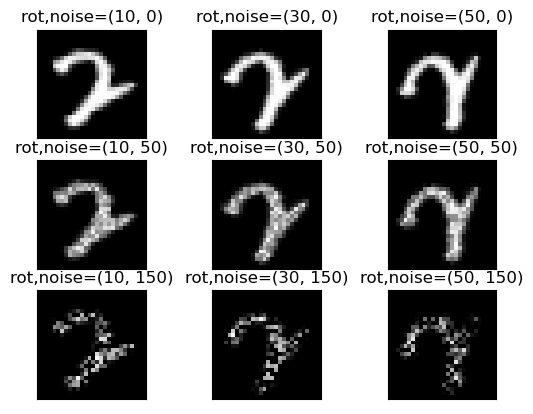

In [36]:
example_2 = x_train.loc[list(y_train.loc[y_train==2].index)[2],:]
new_images = udr.perform_data_agumentation(example_2,
                                           2,
                                           [[10,0],[30,0],[50,0],
                                            [10,50],[30,50],[50,50],
                                            [10,150],[30,150],[50,150]])

<Figure size 640x480 with 0 Axes>

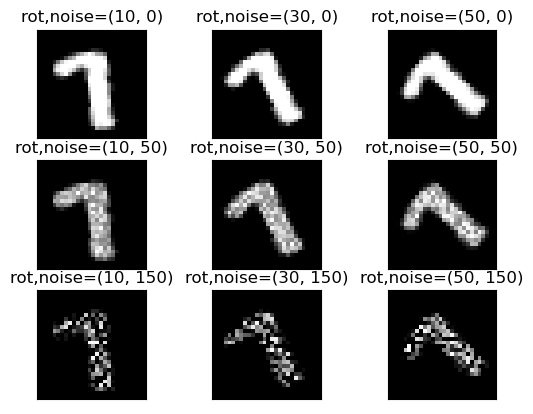

In [37]:
example_7 = x_train.loc[list(y_train.loc[y_train==7].index)[0],:]
new_images = udr.perform_data_agumentation(example_7,
                                           7,
                                           [[10,0],[30,0],[50,0],
                                            [10,50],[30,50],[50,50],
                                            [10,150],[30,150],[50,150]])

<Figure size 640x480 with 0 Axes>

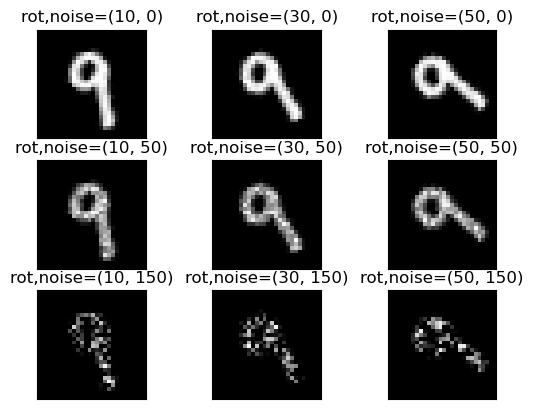

In [38]:
example_9 = x_train.loc[list(y_train.loc[y_train==9].index)[0],:]
new_images = udr.perform_data_agumentation(example_9,
                                           9,
                                           [[10,0],[30,0],[50,0],
                                            [10,50],[30,50],[50,50],
                                            [10,150],[30,150],[50,150]])

From the results above: 
- Rotation: 10 degrees rotation is still acceptable, 30 seems a bit much already =>  we'll force the rotation 
  to be in the interval -20,-10, +10, +20
- Distorsion: 50% distorsion still makes the figure readable, albeit we'd expect this
  parameter to have less explanatory power than the rotation, so we'll only have two values => distorsion will be 0,35

In [48]:
alterations = [[-20,0],[-10,0],[10,0],[20,0],
               [-20,35],[-10,35],[10,35],[20,35]]

augmented_data = []
prog = 0
data_to_augment = train_data.loc[train_data["label"].isin([2,7,9]),:]
# We have some issues dealing with that amount of data locally,
# so what we'll do is get half of the 2s,7s and 9s and augment those
data_to_augment = data_to_augment.loc[data_to_augment.index[:int(0.5*len(data_to_augment))],:]
counts = data_to_augment.groupby(["label"]).size()
print(f"number of examples on each label={counts}") 

for idx,row in data_to_augment.iterrows():
    label = row[0]
    image = row[1:]
    augmented_data.extend(udr.perform_data_agumentation(image, label, alterations, False))
    print(f"Progress...{round(prog/len(data_to_augment),5)}")
    prog += 1

number of examples on each label=label
2    2112
7    2178
9    2093
dtype: int64
Progress...0.0
Progress...0.00016
Progress...0.00031
Progress...0.00047
Progress...0.00063
Progress...0.00078
Progress...0.00094
Progress...0.0011
Progress...0.00125
Progress...0.00141
Progress...0.00157
Progress...0.00172
Progress...0.00188
Progress...0.00204
Progress...0.00219
Progress...0.00235
Progress...0.00251
Progress...0.00266
Progress...0.00282
Progress...0.00298
Progress...0.00313
Progress...0.00329
Progress...0.00345
Progress...0.0036
Progress...0.00376
Progress...0.00392
Progress...0.00407
Progress...0.00423


/tmp/ipykernel_1112326/1993129451.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[0]


Progress...0.00439
Progress...0.00454
Progress...0.0047
Progress...0.00486
Progress...0.00501
Progress...0.00517
Progress...0.00533
Progress...0.00548
Progress...0.00564
Progress...0.0058
Progress...0.00595
Progress...0.00611
Progress...0.00627
Progress...0.00642
Progress...0.00658
Progress...0.00674
Progress...0.00689
Progress...0.00705
Progress...0.00721
Progress...0.00736
Progress...0.00752
Progress...0.00768
Progress...0.00783
Progress...0.00799
Progress...0.00815
Progress...0.0083
Progress...0.00846
Progress...0.00862
Progress...0.00877
Progress...0.00893
Progress...0.00909
Progress...0.00924
Progress...0.0094
Progress...0.00956
Progress...0.00971
Progress...0.00987
Progress...0.01003
Progress...0.01018
Progress...0.01034
Progress...0.0105
Progress...0.01065
Progress...0.01081
Progress...0.01097
Progress...0.01112
Progress...0.01128
Progress...0.01144
Progress...0.01159
Progress...0.01175
Progress...0.01191
Progress...0.01206
Progress...0.01222
Progress...0.01238
Progress...0.0125

In [49]:
augmented_train_data = pd.DataFrame(augmented_data,columns=train_data.columns)
augmented_train_data = pd.concat([augmented_train_data,train_data])

# Check and remove duplicates
i = len(augmented_train_data)
augmented_train_data.drop_duplicates(inplace=True)
print(f"% of duplicates {1.00 - i/len(augmented_train_data)}")

% of duplicates 0.0


In [ ]:
x_aug_train, x_aug_cv, y_aug_train, y_aug_cv = train_test_split(augmented_train_data.iloc[:,1:], augmented_train_data['label'], train_size=0.66, random_state=42)
print(f"We've increased the dataset by {len(augmented_train_data)/len(train_data)}x times")
# At this point may be handy to just export the csv so that we can re-use it from this point onwards

In [50]:
# perform the same operations as in the beginning, split the dataset and run the neuronal networks
# First of all, check if with the augmented dataset, there's any improvement
model_after_augm = {
            'A_100_75_50_25_.0':{'nn':[100,75,50,25],
                        'lambda':0.0}}
i=0
results_after_augm = {}
# We've incremented the epoch of the algorithms as they're more complex than before, so maybe
# we need extra iterations to make the parameters converge
for model_key,model_params in model_after_augm.items():
    results_after_augm[model_key] = udr.build_model_and_train(model_params,x_aug_train,y_aug_train,x_aug_cv,y_aug_cv,categories,100)
    i+=1
    print(f"Progress...{i/len(model_after_augm)}")

We've increased the dataset by 2.215809523809524x times


In [51]:
model_train_cv_after_aug = [[model,round(stats[1],5),round(stats[2],5)] for model,stats in results_after_augm.items()]
model_train_cv_after_aug = pd.DataFrame(model_train_cv_after_aug,columns=['model_params','J_train', 'J_cv'])
new_best_model = model_train_cv_after_aug.loc[model_train_cv_after_aug['J_cv']==min(model_train_cv_after_aug['J_cv']),:]

print(f"new result (after data augmentation)={new_best_model}")
# Compare with the old result
print(f"old result (prior to data augmentation)={best_model}")

1920/1920 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step
Progress...1.0


As it can be seen from the results above, we made the algorithm perform 1% better on the cross_validation metric. Seems a good improvement, but nothing crazy either